<a href="https://colab.research.google.com/github/bcesar2002/Baires-MLPractitioner/blob/main/calculo-metricas-avaliacao/calcula_metricas_avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#!pip install -q tensorflow-gpu==2.0.0-beta1
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.17.0 requires tensorflow<2.18,>=2.17.0, but you have tensorflow 2.18.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
tensorflow-tpu 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.18.0 which is incompatib

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [2]:
tf.__version__

'2.18.0'

In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8990 - loss: 0.3336 - val_accuracy: 0.9840 - val_loss: 0.0489
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9837 - loss: 0.0518 - val_accuracy: 0.9893 - val_loss: 0.0325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9899 - loss: 0.0329 - val_accuracy: 0.9903 - val_loss: 0.0277
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9916 - loss: 0.0250 - val_accuracy: 0.9883 - val_loss: 0.0370
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9914 - val_loss: 0.0296


In [10]:
y_true=test_labels
# y_pred=model.predict_classes(test_images)
y_pred = np.argmax(model.predict(test_images), axis=-1) # Use predict and argmax

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

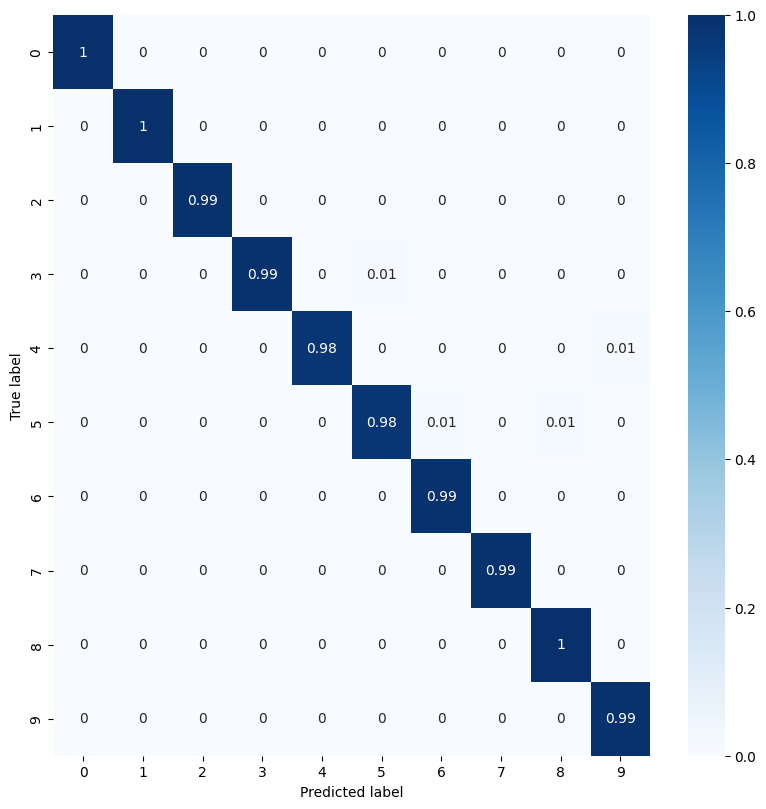

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
# prompt: A partir da matrix de confusão (con_mat_df), calcular as principais métricas para avaliação de modelos de
# classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão
# e F-score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score for each class (macro-average)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0) # zero_division=0 handles cases where precision is undefined
print(f"Precision (Macro-average): {precision}")

recall = recall_score(y_true, y_pred, average='macro', zero_division=0) # zero_division=0 handles cases where recall is undefined
print(f"Recall (Macro-average): {recall}")

f1 = f1_score(y_true, y_pred, average='macro', zero_division=0) # zero_division=0 handles cases where f1 is undefined
print(f"F1-score (Macro-average): {f1}")


# Calculate Specificity (assuming binary classification for each digit against the rest)
# This part needs adjustment for multi-class problems, as specificity is a binary metric.
# One approach is to consider each digit as the positive class, and the rest as the negative class.
specificity_list = []

for digit in classes:
  y_true_binary = (y_true == digit).astype(int)
  y_pred_binary = (y_pred == digit).astype(int)

  tn, fp, fn, tp = tf.math.confusion_matrix(labels=y_true_binary, predictions=y_pred_binary).numpy().ravel()
  specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 # handle potential ZeroDivisionError
  specificity_list.append(specificity)

average_specificity = sum(specificity_list) / len(specificity_list)
print(f"Average Specificity: {average_specificity}")


# You can also calculate precision, recall, and F1 for each class individually
# and then compute the micro-average
precision_micro = precision_score(y_true, y_pred, average='micro')
print(f"Precision (Micro-average): {precision_micro}")

recall_micro = recall_score(y_true, y_pred, average='micro')
print(f"Recall (Micro-average): {recall_micro}")

f1_micro = f1_score(y_true, y_pred, average='micro')
print(f"F1-score (Micro-average): {f1_micro}")

Accuracy: 0.9914
Precision (Macro-average): 0.9913750289260566
Recall (Macro-average): 0.9912135009601599
F1-score (Macro-average): 0.9912797165455289
Average Specificity: 0.9990447206445336
Precision (Micro-average): 0.9914
Recall (Micro-average): 0.9914
F1-score (Micro-average): 0.9914


In [14]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
import tensorflow as tf
from tensorflow import keras  # Import keras from tensorflow
import io

file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  # test_pred = model1.predict_classes(test_images)
  test_pred = np.argmax(model1.predict(test_images), axis=-1) # Use predict and argmax

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)

  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)


logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [21]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0,
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
# Start TensorBoard.
%tensorboard --logdir logs/images